In [1]:
import pandas as pd
import numpy as np

In [2]:
from pyspark.sql import SparkSession

# create a SparkSession object
spark = SparkSession.builder.appName("DataTaxis").getOrCreate()



23/05/21 00:45:08 WARN Utils: Your hostname, marius-Latitude-3410 resolves to a loopback address: 127.0.1.1; using 10.30.204.156 instead (on interface wlp0s20f3)
23/05/21 00:45:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/21 00:45:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/21 00:45:09 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/05/21 00:45:09 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [12]:
# read the parquet file
df_3= spark.read.parquet("C:/Users/msi/Downloads/yellow_tripdata_2019-03.Parquet")
df_4= spark.read.parquet("C:/Users/msi/Downloads/yellow_tripdata_2019-04.Parquet")
df_Hvr= spark.read.parquet("C:/Users/msi/Desktop/ProjetBigData/fhv_tripdata_2019-02.Parquet")


df_3.columns
#df_3.show()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [13]:
df=df_3


In [14]:

# Dropping Entire rows containing Null 
df.na.drop()


DataFrame[VendorID: bigint, tpep_pickup_datetime: timestamp, tpep_dropoff_datetime: timestamp, passenger_count: double, trip_distance: double, RatecodeID: double, store_and_fwd_flag: string, PULocationID: bigint, DOLocationID: bigint, payment_type: bigint, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, improvement_surcharge: double, total_amount: double, congestion_surcharge: double, airport_fee: int]

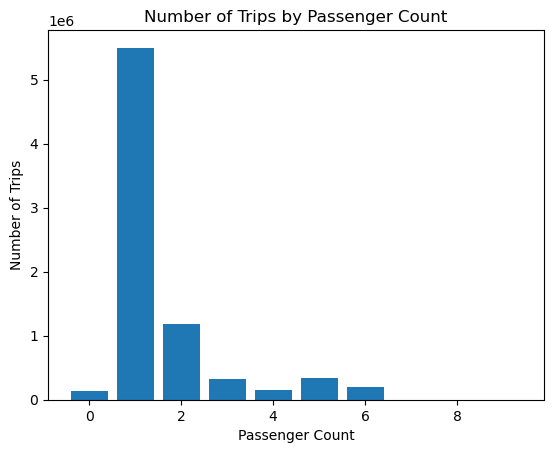

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
dfpasserger=df.groupby('passenger_count').count()
# Plot the trip counts
trip_counts_pd = dfpasserger.toPandas()
plt.bar(trip_counts_pd["passenger_count"], trip_counts_pd["count"])
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.title("Number of Trips by Passenger Count")
plt.show()



Largest distance traveled during the month:  237.17  miles


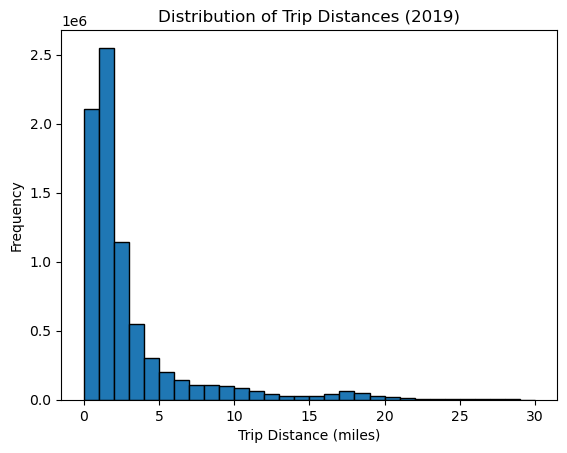

In [46]:
from pyspark.sql.functions import col
# Filter the data for trips with zero passengers
zero_passenger_trips = df.filter(col("passenger_count") == 0)

# Find the special characteristics of trips with zero passengers
# You can perform further analysis or exploration on this filtered DataFrame

# Filter the data for trips with more than six passengers
large_group_trips = df.filter(col("passenger_count") > 6)

# Find the special characteristics of trips with more than six passengers
# You can perform further analysis or exploration on this filtered DataFrame

# Find the largest distance traveled during the month
largest_distance = df.selectExpr("MAX(trip_distance) AS max_distance").collect()[0]["max_distance"]

# Print the largest distance traveled during the month
print("Largest distance traveled during the month: ", largest_distance, " miles")

# Filter the data for non-zero trip distances less than 30 miles
filtered_data = df.filter((col("trip_distance") > 0) & (col("trip_distance") < 30))

# Convert the filtered data to a Pandas DataFrame for plotting
filtered_data_pd = filtered_data.select("trip_distance").toPandas()

# Plot the distribution of trip distances
plt.hist(filtered_data_pd["trip_distance"], bins=30, edgecolor="black")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distances (2019)")
plt.show()

In [14]:
df.explain()

== Physical Plan ==
*(1) Filter atleastnnonnulls(8, VendorID#0L, passenger_count#3, trip_distance#4, PULocationID#7L, DOLocationID#8L, payment_type#9L, extra#11, total_amount#16)
+- *(1) ColumnarToRow
   +- FileScan parquet [VendorID#0L,passenger_count#3,trip_distance#4,PULocationID#7L,DOLocationID#8L,payment_type#9L,extra#11,total_amount#16] Batched: true, DataFilters: [atleastnnonnulls(8, VendorID#0L, passenger_count#3, trip_distance#4, PULocationID#7L, DOLocation..., Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/C:/Users/msi/Downloads/yellow_tripdata_2019-03.Parquet], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<VendorID:bigint,passenger_count:double,trip_distance:double,PULocationID:bigint,DOLocation...




In [37]:
df_3.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: integer (nullable = true)



In [97]:
pickup_counts = df_3.groupby(F.dayofweek('tpep_pickup_datetime').alias('pickup_day'), F.hour('tpep_pickup_datetime').alias('pickup_hour')).count()
avg_fare = df_3.groupby(F.dayofweek('tpep_pickup_datetime').alias('pickup_day'), F.hour('tpep_pickup_datetime').alias('pickup_hour')).avg('fare_amount')
avg_duration = df_3.groupby(F.dayofweek('tpep_pickup_datetime').alias('pickup_day'), F.hour('tpep_pickup_datetime').alias('pickup_hour')).avg('trip_distance')
#bkk=pickup_counts.groupby(['pickup_day','pickup_hour']).count()

In [124]:
df=avg_fare
df=df.toPandas()
df=df.sort_values(by=['pickup_hour'])


,pickup_day,pickup_hour,avg(fare_amount)
24,6,0,13.613664
145,3,0,14.567331
161,7,0,13.599311
26,4,0,13.684952
5,1,0,12.650144
...,...,...,...
79,6,23,13.079461
76,1,23,14.859476
72,4,23,12.861986
60,5,23,13.371273


In [133]:
df=avg_fare
df=df.toPandas()
df=df.sort_values(by=['pickup_hour'])
df

,pickup_day,pickup_hour,avg(fare_amount)
24,6,0,13.613664
145,3,0,14.567331
161,7,0,13.599311
26,4,0,13.684952
5,1,0,12.650144
...,...,...,...
79,6,23,13.079461
76,1,23,14.859476
72,4,23,12.861986
60,5,23,13.371273


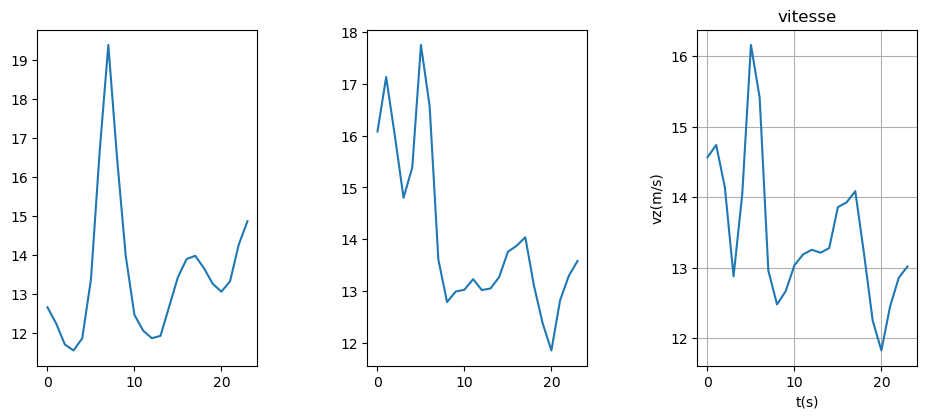

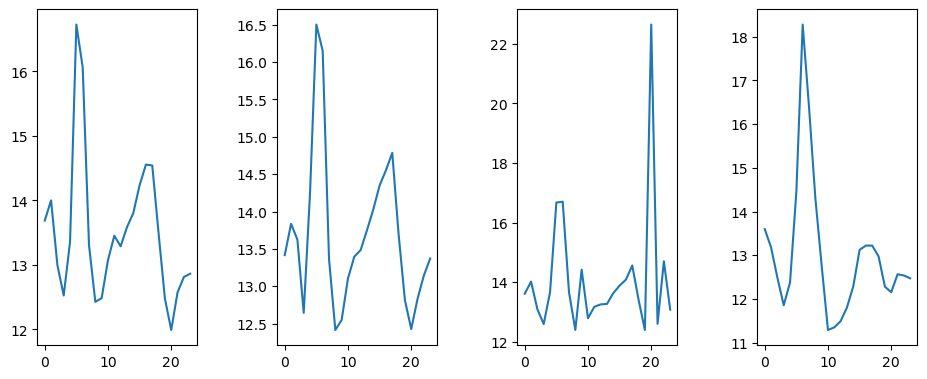

In [159]:
df=avg_fare
df=df.toPandas()
df=df.sort_values(by=['pickup_hour'])
ig1, axs1 = plt.subplots(1, 3)
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5, top = 0.9, wspace = 0.5, hspace = 0)
axs1[0].plot(df[df.pickup_day==1]['pickup_hour'], df[df.pickup_day==1]['avg(fare_amount)'])
plt.title ('vitesse')
plt.grid()
plt.xlabel('t(s)')
plt.ylabel('vz(m/s)')
axs1[1].plot(df[df.pickup_day==2]['pickup_hour'], df[df.pickup_day==2]['avg(fare_amount)'])
axs1[2].plot(df[df.pickup_day==3]['pickup_hour'], df[df.pickup_day==3]['avg(fare_amount)'])


ig2, axs2 = plt.subplots(1, 4)
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5, top = 0.9, wspace = 0.5, hspace = 0)
axs2[0].plot(df[df.pickup_day==4]['pickup_hour'], df[df.pickup_day==4]['avg(fare_amount)'])
axs2[1].plot(df[df.pickup_day==5]['pickup_hour'], df[df.pickup_day==5]['avg(fare_amount)'])
axs2[2].plot(df[df.pickup_day==6]['pickup_hour'], df[df.pickup_day==6]['avg(fare_amount)'])
axs2[3].plot(df[df.pickup_day==7]['pickup_hour'], df[df.pickup_day==7]['avg(fare_amount)'])


plt.show()

TypeError: 'Column' object is not callable

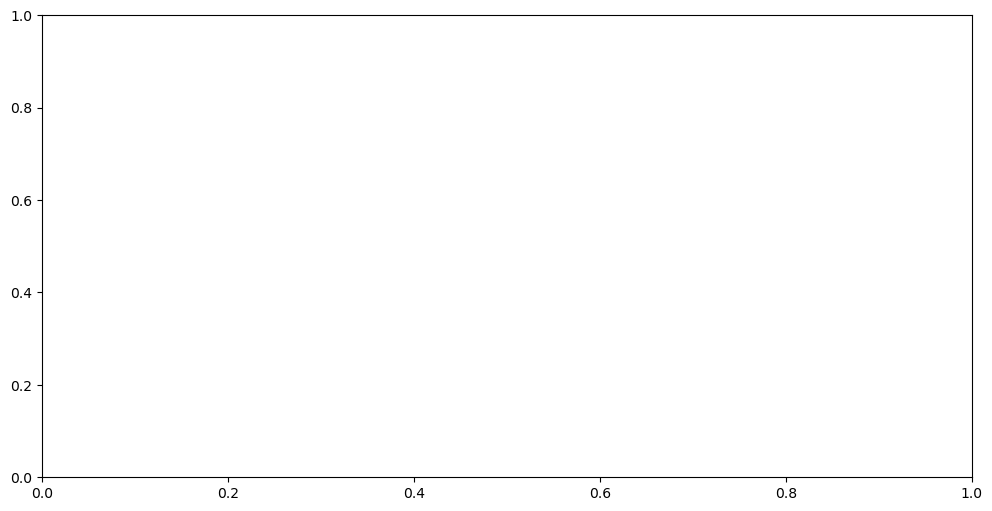

In [94]:
# Create a DataFrame
data = [("Alice", 25), ("Bob", 30), ("Alice", 35), ("Bob", 20)]
df = spark.createDataFrame(data, ["Name", "Age"])

# Group the DataFrame by "Name"
grouped_data = df.groupBy("Name")

# Perform aggregation on grouped_data
aggregated_df = grouped_data.agg({"Age": "avg", "Name": "count"})

# Convert GroupedData to DataFrame
result_df = aggregated_df.toDF()

# Show the result DataFrame
result_df.show()

IllegalArgumentException: requirement failed: The number of columns doesn't match.
Old column names (3): Name, avg(Age), count(Name)
New column names (0): 

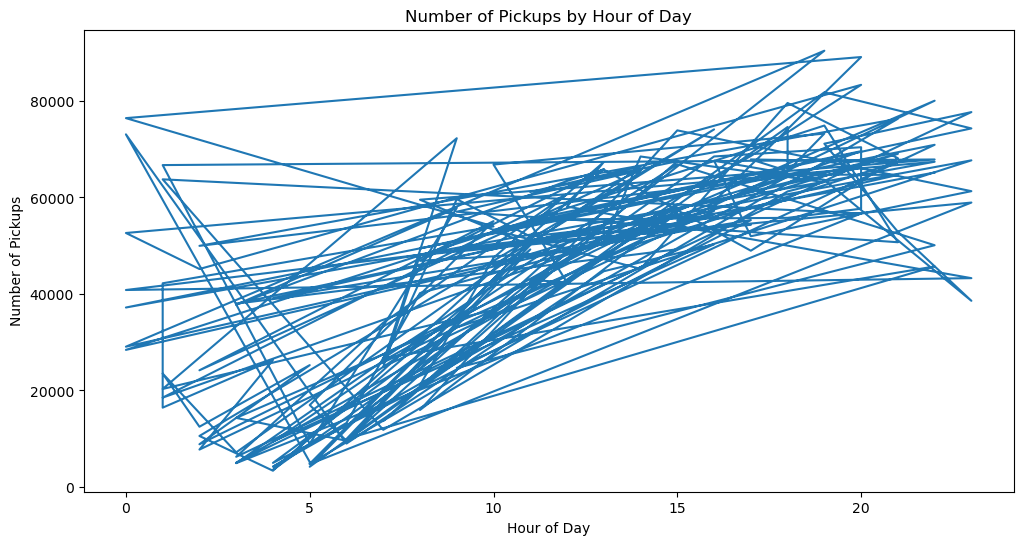

In [44]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(pickup_counts.select('pickup_hour').collect(), pickup_counts.select('count').collect())
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups by Hour of Day')
plt.show()

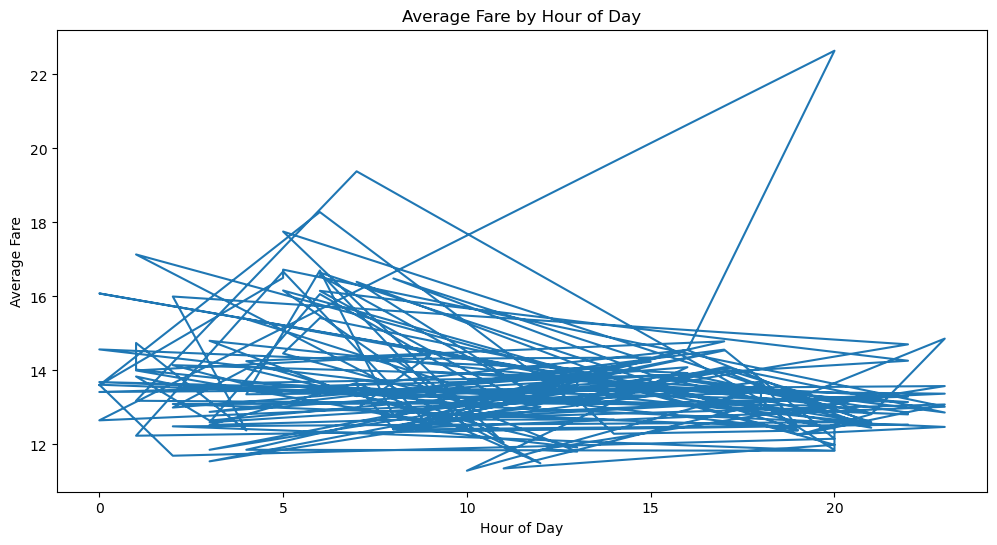

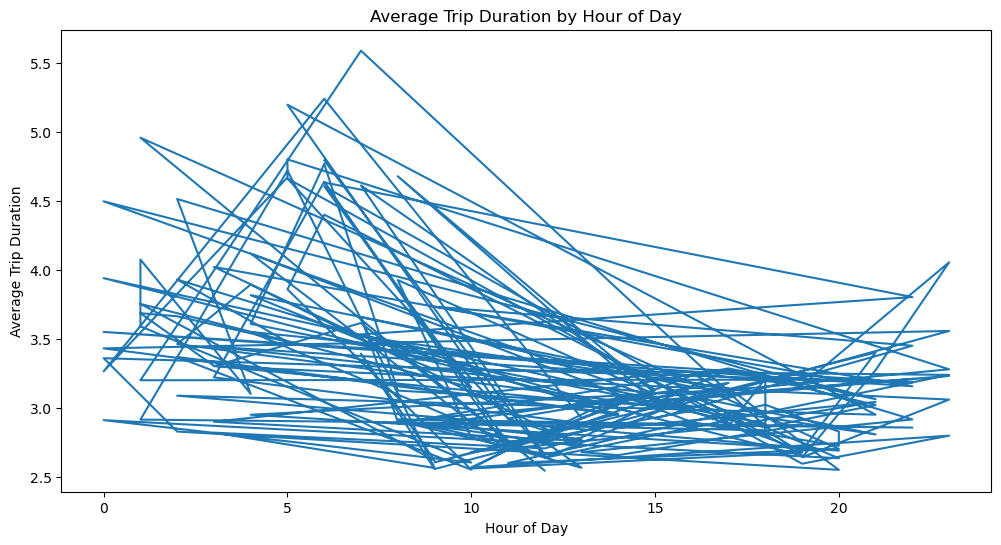

In [45]:


# Plotting the average fare
plt.figure(figsize=(12, 6))
plt.plot(avg_fare.select('pickup_hour').collect(), avg_fare.select('avg(fare_amount)').collect())
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')
plt.title('Average Fare by Hour of Day')
plt.show()

# Plotting the average trip duration
plt.figure(figsize=(12, 6))
plt.plot(avg_duration.select('pickup_hour').collect(), avg_duration.select('avg(trip_distance)').collect())
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of Day')
plt.show()


In [19]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Create 

# Read the Parquet file and assign column names
df_3 = df_3.toDF('VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
                 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
                 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
                 'congestion_surcharge', 'airport_fee')

# Compute the time series for each metric

# Number of Pickups
pickup_time_series = df_3.withColumn('pickup_day', F.dayofweek('tpep_pickup_datetime')) \
                         .withColumn('pickup_hour', F.hour('tpep_pickup_datetime')) \
                         .groupBy('pickup_day', 'pickup_hour') \
                         .count() \
                         .orderBy('pickup_day', 'pickup_hour')

# Average Fare
fare_time_series = df_3.withColumn('pickup_day', F.dayofweek('tpep_pickup_datetime')) \
                       .withColumn('pickup_hour', F.hour('tpep_pickup_datetime')) \
                       .groupBy('pickup_day', 'pickup_hour') \
                       .agg(F.avg('fare_amount').alias('avg_fare')) \
                       .orderBy('pickup_day', 'pickup_hour')

# Average Trip Duration
duration_time_series = df_3.withColumn('pickup_day', F.dayofweek('tpep_pickup_datetime')) \
                           .withColumn('pickup_hour', F.hour('tpep_pickup_datetime')) \
                           .withColumn('trip_duration', F.expr('unix_timestamp(tpep_dropoff_datetime) - unix_timestamp(tpep_pickup_datetime)')) \
                           .groupBy('pickup_day', 'pickup_hour') \
                           .agg(F.avg('trip_duration').alias('avg_duration')) \
                           .orderBy('pickup_day', 'pickup_hour')

# Average Ongoing Trips
ongoing_trips_time_series = df_3.filter(F.col('tpep_dropoff_datetime').isNull()) \
                                .withColumn('pickup_day', F.dayofweek('tpep_pickup_datetime')) \
                                .withColumn('pickup_hour', F.hour('tpep_pickup_datetime')) \
                                .groupBy('pickup_day', 'pickup_hour') \
                                .count() \
                                .orderBy('pickup_day', 'pickup_hour')

# Convert the time series DataFrames to Pandas DataFrames for plotting
pickup_pd = pickup_time_series.toPandas()
fare_pd = fare_time_series.toPandas()
duration_pd = duration_time_series.toPandas()
ongoing_pd = ongoing_trips_time_series.toPandas()

# Plot the time series

def plot_time_series(data, x_label, y_label, title):
    pivot_data = data.pivot(index='pickup_day', columns='pickup_hour', values='count')
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hours = list(range(24))
    fig, ax = plt.subplots(figsize=(12, 6))
    im = ax.imshow(pivot_data.values,


SyntaxError: unexpected EOF while parsing (6986855.py, line 58)

In [12]:
df.show()

+-------+
|  count|
+-------+
|7866620|
+-------+



In [20]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Calculate the number of pickups by grouping the data by day of the week and hour of the day
pickup_counts = df_3.groupby(F.dayofweek('tpep_pickup_datetime').alias('pickup_day'), F.hour('tpep_pickup_datetime').alias('pickup_hour')).count()

# Calculate the average fare by grouping the data by day of the week and hour of the day
avg_fare = df_3.groupby(F.dayofweek('tpep_pickup_datetime').alias('pickup_day'), F.hour('tpep_pickup_datetime').alias('pickup_hour')).avg('fare_amount')

# Calculate the average trip duration by grouping the data by day of the week and hour of the day
avg_duration = df_3.groupby(F.dayofweek('tpep_pickup_datetime').alias('pickup_day'), F.hour('tpep_pickup_datetime').alias('pickup_hour')).avg('trip_duration')

# Calculate the average ongoing trips by grouping the data by day of the week and hour of the day
avg_ongoing_trips = df_3.filter(df_3['tpep_dropoff_datetime'].isNull()).groupby(F.dayofweek('tpep_pickup_datetime').alias('pickup_day'), F.hour('tpep_pickup_datetime').alias('pickup_hour')).count()

# Convert the resulting PySpark DataFrames to Pandas for plotting
pickup_counts_pd = pickup_counts.toPandas()
avg_fare_pd = avg_fare.toPandas()
avg_duration_pd = avg_duration.toPandas()
avg_ongoing_trips_pd = avg_ongoing_trips.toPandas()

# Plotting the number of pickups
plt.figure(figsize=(12, 6))
plt.plot(pickup_counts_pd['pickup_hour'], pickup_counts_pd['count'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups by Hour of Day')
plt.show()

# Plotting the average fare
plt.figure(figsize=(12, 6))
plt.plot(avg_fare_pd['pickup_hour'], avg_fare_pd['avg(fare_amount)'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')
plt.title('Average Fare by Hour of Day')
plt.show()

# Plotting the average trip duration
plt.figure(figsize=(12, 6))
plt.plot(avg_duration_pd['pickup_hour'], avg_duration_pd['avg(trip_duration)'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of Day')
plt.show()

# Plotting the average ongoing trips
plt.figure(figsize=(12, 6))
plt.plot(avg_ongoing_trips_pd['pickup_hour'], avg_ongoing_trips_pd['count'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Ongoing Trips')
plt.title('Average Ongoing Trips by Hour of Day')
plt.show()


AnalysisException: Cannot resolve column name "trip_duration" among (VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee)